## Función de pérdida / Función de activación (Tabla resumen y aplicación)

- Dependiente del problema
 - Clasificación binaria: función activación ultima capa (sigmoide), función de perdida (binary_crossentropy)
 - Clasificacion multiclase: función activación ultima capa (softmax), función de perdida (categorical_crossentropy)
 - Regresión con valores arbitrarios: función activación ultima capa (none), función de perdida (mse)
 - Regresión valores 0 a 1: función activación ultima capa (sigmoide), función de perdida (mse o binary_crossentropy)    

 
| TIPO PROBLEMA | F. ACTIVACIÓN | F. PÉRDIDA | OPTIMIZADOR |
|---------------|---------------|------------|-------------|
| CLASIFICACION BINARIA | SIGMOIDE | BINARY CROSSENTROPY | ADAM/RMSPROP |
| CLASIFICACIÓN MULTICLASE| SOFTMAX | CATEGORICAL CROSSENTROPY| ADAM/RMSPROP |
| REGRESIÓN | RELU/TANH | MSE | ADAM/SGD |
| REGRESIÓN CON VALORES ARBITRARIOS | NINGUNA/RELU/TANH | MSE| ADAM/SGD |
| REGRESION CON VALORES 0 A 1 | SIGMOIDE | MSE / BINARY CROSSENTROPY| ADAM/RMSPROP |
| DETECCIÓN ANOMALÍAS | SIGMOIDE/RELU | MAE/BINARY CROSSENTROPY | ADAM/SGD |
| NLP | RELU/TANH | CATEGORICAL CROSSENTROPY | ADAM |
| VISION POR COMPUTADOR (CLAS.IMÁGENES) | RELU/SOFTMAX | CATEGORICAL CROSSENTROPY | ADAM |
| PREDICCIÓN SERIES TEMPORALES | RELU/TANH | MSE/MAE | ADAM/RMSPROP

 
 Información en Keras https://keras.io/losses/

## Criterios (extendidos) para la selección de la función de activación

 Las distintas funciones de activación de las redes neuronales tienen una gran variedad de aplicaciones prácticas, adaptadas a distintos tipos de problemas y arquitecturas de modelos. He aquí algunos ejemplos de aplicaciones prácticas para cada una de las principales funciones de activación:


### Sigmoide
- Clasificación binaria: se utiliza como última capa para producir probabilidades (entre 0 y 1) que indican la clase predictiva.
- Detección de objetos: Se puede utilizar para predecir la probabilidad de que un objeto esté presente en una región de interés.
- Reconocimiento de textos: se utiliza para estimar la probabilidad de aparición de una palabra o entidad específica.
‍

### Tanh(tangente hiperbólica)
- Redes neuronales tradicionales: suelen utilizarse en las capas ocultas para introducir la no linealidad y normalizar los valores de entrada entre -1 y 1.
- Reconocimiento del habla: se utiliza para clasificar fonemas y palabras en los sistemas de reconocimiento del habla.
- Tratamiento de señales: se aplica a la segmentación y clasificación de señales en medicina o telecomunicaciones.
‍

### ReLU(Unidad lineal rectificada)
- Redes neuronales convolucionales (CNNs) : Muy populares en CNNs de capa oculta para extraer características visuales en visión por computador.
- Detección de objetos: se utiliza para extraer características robustas y reducir el tiempo de cálculo en los modelos de detección de objetos.
- Análisis del lenguaje natural: se utiliza para la clasificación de textos y la modelización de sentimientos por su sencillez y rendimiento.
‍

### Leaky ReLU
- Redes neuronales profundas: se utilizan para paliar el problema de la "neurona muerta" asociado a ReLU, mejorando la solidez y estabilidad del aprendizaje.
- Generación de imágenes: se utiliza en los modelos de generación de imágenes para mantener una distribución más estable y diversa de las muestras generadas.
- Predicción de series temporales: se utiliza para modelizar tendencias y variaciones en datos de series temporales gracias a su capacidad para manejar entradas negativas.
‍

### ELU(Unidad lineal exponencial)
- Redes neuronales profundas: se utiliza como alternativa a ReLU para lograr una convergencia más rápida y estable al entrenar redes profundas.
- Procesamiento del lenguaje natural: Se aplica en modelos de procesamiento del lenguaje para el análisis semántico y la generación de textos debido a su capacidad para mantener gradientes estables.
- Predicción de series temporales: se utiliza para captar tendencias y relaciones no lineales en datos de series temporales con un rendimiento mejorado respecto a otras funciones.
‍

### Softmax
- Clasificación multiclase: se utiliza como capa final para normalizar la salida en probabilidades para varias clases, a menudo se utiliza en redes de clasificación.
- Modelos de recomendación: se utilizan para evaluar y clasificar las preferencias de los usuarios en los sistemas de recomendación.
- Análisis de sentimientos: Se utiliza para predecir y clasificar el sentimiento a partir de texto en línea, como reseñas de productos o comentarios sociales.
‍

### PReLU(Unidad lineal paramétrica rectificada)
- Redes neuronales profundas: se utilizan como alternativa a ReLU para paliar el problema de la "neurona muerta" permitiendo una ligera pendiente negativa para las entradas negativas, lo que mejora la robustez del modelo.
- Detección de objetos: se utiliza para extraer características robustas y mejorar la precisión de los modelos de detección de objetos en Computer Vision.
- Procesamiento del lenguaje natural: se utiliza en redes neuronales recurrentes para modelar dependencias a largo plazo y mejorar la precisión de las predicciones de texto.
‍

### Swish
- Redes neuronales profundas: Reconocido por su eficacia y rendimiento en redes profundas al amplificar las señales positivas y mejorar la no linealidad.
- Clasificación de imágenes: se utiliza para la clasificación de imágenes y el reconocimiento de objetos en redes neuronales convolucionales, mejorando a menudo el rendimiento respecto a ReLU.
- Modelización de series temporales: se aplica para captar relaciones complejas y no lineales en los datos de series temporales, lo que permite mejorar la predicción y la generalización.
‍

Al elegir adecuadamente entre estas funciones de activación en función del tipo de problema y de las características de los datos, se pueden optimizar el rendimiento de los modelos de Deep Learning minimizando el riesgo de sobreajuste y mejorando la capacidad de generalización a datos no vistos.

Debemos tener en cuenta que cada función de activación aporta ventajas específicas que pueden aprovecharse para satisfacer los diversos requisitos de las aplicaciones reales.

## Construcción de una Red Neuronal Sencilla con TENSORFLOW y KERAS

**TensorFlow** es un ecosistema propuesto por Google que se ha convertido en el entorno más popular para desarrolladores de aplicaciones que requieran Deep Learning. Desde su lanzamiento inicial en 2015 por parte del equipo de Google Brain, el paquete cuenta con decenas de millones de descargas y con alrededor de dos mil contribuidores.   

**Keras** ofrece una API cuya curva de aprendizaje es muy suave en comparación con otras. Los modelos de Deep Learning son complejos y, si se quieren programar a bajo nivel, requieren un conocimiento matemático de base importante para manejarse fácilmente. Por suerte para nosotros, Keras encapsula las sofisticadas matemáticas de tal manera que el desarrollador de una red neuronal solo necesita saber construir un modelo a partir de componentes preexistentes y acertar en su parametrización.   
La implementación de referencia de la librería de Keras fue desarrollada y es mantenida por François Chollet76, ingeniero de Google, y su código ha sido liberado bajo la licencia permisiva del MIT. Su documentación y especificaciones están disponibles en la página web oficial https://keras.io   

*tf.keras* es la implementación de TensorFlow de las especificaciones API de Keras. Esta es una API de alto nivel para construir y entrenar modelos que incluye soporte para funcionalidades específicas de TensorFlow, como eager execution o procesamiento de datos con tf.data.

### Importamos librerías necesarias

In [1]:
# IMPORTAMOS LIBRERIAS

import keras
from keras.models import Sequential  
from keras import layers
from keras.layers import Dense  
import numpy  
import pandas

import warnings
warnings.filterwarnings("ignore")

numpy.random.seed(7)



2025-02-27 19:37:57.473054: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-02-27 19:37:57.659834: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1740685077.730419   40692 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1740685077.750630   40692 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-02-27 19:37:57.941195: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instr

### Cargamos dataset "Titanic-rn"

In [2]:
data = pandas.read_csv("datasets/titanic-rn.csv", delimiter=",")
data.head()

,survived,sex,age,n_siblings_spouses,parch,fare,class,deck,embark_town,alone
0,0,male,22.0,1,0,7.2500,Third,unknown,Southampton,n
1,1,female,38.0,1,0,71.2833,First,C,Cherbourg,n
2,1,female,26.0,0,0,7.9250,Third,unknown,Southampton,y
3,1,female,35.0,1,0,53.1000,First,C,Southampton,n
4,0,male,28.0,0,0,8.4583,Third,unknown,Queenstown,y


In [3]:
#Cambiar los valores de la columna "ocean_proximity" a valores numericos:
#data_procesado['ocean_proximity'] = data_procesado['ocean_proximity'].map({'NEAR BAY': 1, '<1H OCEAN': 2, 'INLAND': 3, 'NEAR OCEAN': 4, 'ISLAND': 5})

In [10]:
X = data[:,0:8]  
Y = data[:,8]

InvalidIndexError: (slice(None, None, None), slice(0, 8, None))

In [ ]:
print(X.shape)
print(Y.shape)

(768, 8)
(768,)


### Creamos modelo de Red Neuronal (formato antiguo vs. formato nuevo)

In [6]:
model = Sequential()  
model.add(Dense(12, input_dim=8, activation='relu'))  
model.add(Dense(8, activation='relu'))  
model.add(Dense(1, activation='sigmoid'))

2025-02-27 19:40:58.883190: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


In [ ]:
model2 = keras.Sequential([
    keras.layers.Input(shape=(8,)),
    keras.layers.Dense(12, activation='relu'),
    keras.layers.Dense(8, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')    
])

### Compilamos el modelo RN

In [ ]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model2.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

### Entrenamos el modelo RN

In [9]:
model.fit(X, Y, epochs=150, batch_size=10)

NameError: name 'X' is not defined

In [ ]:
model2.fit(X, Y, epochs=150, batch_size=10)

Epoch 1/150


77/77 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5926 - loss: 3.3312
Epoch 2/150
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6322 - loss: 2.4143
Epoch 3/150
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5971 - loss: 1.8919
Epoch 4/150
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6089 - loss: 1.3168
Epoch 5/150
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6619 - loss: 0.9551
Epoch 6/150
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6630 - loss: 0.8062
Epoch 7/150
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5994 - loss: 0.8415
Epoch 8/150
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6623 - loss: 0.7310
Epoch 9/150
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6410 - loss: 0.7766
Epoch 10/150
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6476 - loss: 0.7219
Epoch 11/150
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6604 - loss: 0.6868  
Epoch 12/150
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6505 - 

In [ ]:
# import importlib
# importlib.reload(utilsRNA) 

import utilsRNA as ut
ut.compile_model(model, 'adam', 'binary_crossentropy', 'accuracy')
history = ut.fit_model(model, X, Y, 150, 10)


Epoch 1/20


2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 134ms/step - accuracy: 0.7910 - loss: 0.4552 - val_accuracy: 0.7667 - val_loss: 0.4816
Epoch 2/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 0.7912 - loss: 0.4443 - val_accuracy: 0.7600 - val_loss: 0.4910
Epoch 3/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - accuracy: 0.7996 - loss: 0.4506 - val_accuracy: 0.7667 - val_loss: 0.4839
Epoch 4/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - accuracy: 0.7942 - loss: 0.4448 - val_accuracy: 0.7600 - val_loss: 0.4913
Epoch 5/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 0.7901 - loss: 0.4461 - val_accuracy: 0.7733 - val_loss: 0.4908
Epoch 6/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 0.7877 - loss: 0.4502 - val_accuracy: 0.7667 - val_loss: 0.4859
Epoch 7/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - accuracy: 0.7838 - loss: 0.4472 - val_accuracy: 0.7667 - val_loss: 0.4936
Epoch 8/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.7996 - loss: 0.4548 - val_accuracy: 0.7667 - val_loss: 0.4926
Epoch 9/20

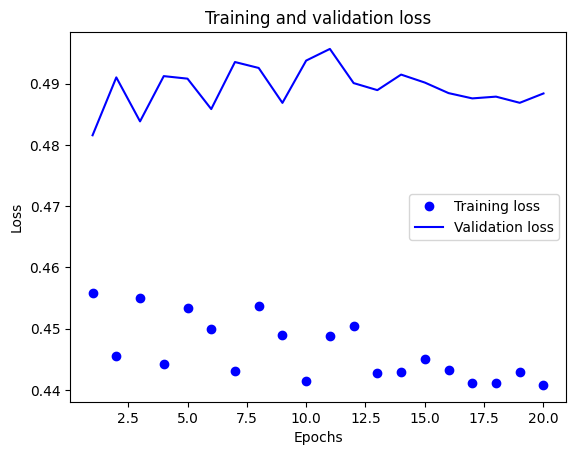

In [ ]:
ut.plot_loss(history,'accuracy')

### Evaluamos el modelo

In [ ]:
scores = model.evaluate(X, Y)  
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7547 - loss: 0.4725 

compile_metrics: 78.65%


In [ ]:
scores = model2.evaluate(X, Y)  
print("\n%s: %.2f%%" % (model2.metrics_names[1], scores[1]*100))

24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7599 - loss: 0.4807 

compile_metrics: 78.52%


### Realizamos predicciones

In [ ]:
# Predicciones 
predictions = model.predict(X)  
rounded = [round(x[0]) for x in predictions]  
print(rounded)

24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
[1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1,

In [ ]:
# Predicciones 
predictions = model2.predict(X)  
rounded = [round(x[0]) for x in predictions]  
print(rounded)

24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
[1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,

## Construcción de una Red Neuronal Sencilla con PYTORCH

**PyTorch** es una librería de Python para deep learning creada y publicada por Facebook.
Además de PyTorch, también existe la librería *torchvision* que se utiliza habitualmente junto con PyTorch. Proporciona multitud de funciones útiles para proyectos de visión por computador.   
Para instalar Pytorch sistema, a través de *pip*, ejecutaremos la siguiente instrucción:   

***pip install torch torchvision***

### Importamos librerías necesarias

In [ ]:
import numpy as np
import torch 




In [ ]:
import torch.nn as nn
import torch.optim as optim

In [ ]:
dataset = np.loadtxt('/workspaces/workspaceAI/CEIABD_MODULOS_IA/_Ejercicios/datasets/titanic-rn.csv', delimiter=',')
X = dataset[:,0:8]
y = dataset[:,8]
X = torch.tensor(X, dtype=torch.float32)
y = torch.tensor(y, dtype=torch.float32).reshape(-1, 1)

ValueError: could not convert string 'survived' to float64 at row 0, column 1.

Definimos la arquitectura de la RN

In [ ]:
model = nn.Sequential(          # Sequential es una pila de capas
    nn.Linear(8, 12),           # Capa lineal de 8 neuronas a 12. Equivalente a la capa Dense de Keras
    nn.ReLU(),                  # Función de activación ReLU
    nn.Linear(12, 8),           # Capa lineal de 12 neuronas a 8
    nn.ReLU(),                  # Función de activación ReLU
    nn.Linear(8, 1),            # Capa lineal de 8 neuronas a 1
    nn.Sigmoid()                # Función de activación Sigmoid. Se usa esta función de activación porque es un problema de clasificación binaria.
)
print(model)

Sequential(
  (0): Linear(in_features=8, out_features=12, bias=True)
  (1): ReLU()
  (2): Linear(in_features=12, out_features=8, bias=True)
  (3): ReLU()
  (4): Linear(in_features=8, out_features=1, bias=True)
  (5): Sigmoid()
)


Definimos hiperparámetros

In [ ]:

loss_fn = nn.BCELoss() # binary cross-entropy
optimizer = optim.Adam(model.parameters(), lr=0.001)

Bucle de entrenamiento

In [ ]:
n_epochs = 100
batch_size = 10
for epoch in range(n_epochs):               # bucle de entrenamiento en base al número de épocas
    for i in range(0, len(X), batch_size):  # bucle de entrenamiento en base al tamaño del batch
        Xbatch = X[i:i+batch_size]          # seleccionamos el batch
        y_pred = model(Xbatch)              # hacemos la predicción
        ybatch = y[i:i+batch_size]          # seleccionamos las etiquetas
        loss = loss_fn(y_pred, ybatch)      # calculamos la pérdida
        optimizer.zero_grad()               # ponemos a cero los gradientes
        loss.backward()                     # retropropagamos
        optimizer.step()                    # actualizamos los pesos
    print(f'Finished epoch {epoch}, latest loss {loss}')

NameError: name 'X' is not defined

### Inferencia (predicción)   

In [ ]:
i = 5
X_sample = X[i:i+1]             # seleccionamos una muestra
model.eval()                    # ponemos el modelo en modo evaluación
with torch.no_grad():           # deshabilitamos el cálculo de gradientes
    y_pred = model(X_sample)    # hacemos la predicción
print(f"{X_sample[0]} -> {y_pred[0]}")

tensor([  5.0000, 116.0000,  74.0000,   0.0000,   0.0000,  25.6000,   0.2010,
         30.0000]) -> tensor([0.2464])



Algunos modelos se comportarán de forma diferente entre el entrenamiento y la inferencia. 
- La línea de **model.eval()** es para señalar al modelo que la intención es ejecutar el modelo para la inferencia. 
- La línea de **torch.no_grad()** es para crear un contexto para ejecutar el modelo, de tal forma que PyTorch sepa que calcular el gradiente no es necesario. Esto puede consumir menos recursos.   

Así es también como se puede evaluar el modelo. El modelo produce un valor sigmoide, que está entre 0 y 1. Se puede interpretar el valor redondeando este al entero más cercano (es decir, la etiqueta booleana). Comparando la frecuencia con la que la predicción tras el redondeo coincide con el objetivo, se puede asignar un porcentaje de precisión al modelo, como se ve a continuación:

In [ ]:
model.eval()                # ponemos el modelo en modo evaluación
with torch.no_grad():       # deshabilitamos el cálculo de gradientes
    y_pred = model(X)       # hacemos la predicción

In [ ]:
accuracy = (y_pred.round() == y).float().mean() # Se redondea y_pred para que sea un valor 0 o 1
print(f"Accuracy:  {accuracy}")

Accuracy:  0.7708333134651184


## EJERCICIOS

Datasets para realizar ejercicios de clasificacion con RNA's:   

- ABALONE --> https://archive.ics.uci.edu/dataset/1/abalone  (Datos sobre conchas/caracolas marinas)
- TITANIC --> https://storage.googleapis.com/tf-datasets/titanic/train.csv

